In [50]:
import pandas as pd

# Leer solo las primeras líneas del CSV para detectar el rango de fechas
file_path = "mayo.csv"

# Leemos las primeras dos filas sin tocar nada
df_preview = pd.read_csv(file_path, sep='\t', encoding='latin-1', engine='python')

# Mostrar el texto de la primera celda (donde viene el rango)
texto = df_preview.columns[0]
print("🗓️ Rango de fechas detectado en el ABC:")
print(texto)


🗓️ Rango de fechas detectado en el ABC:
Código


In [51]:
df_preview

,Código,Descripción,Unidades,Importe Total,Importe Total I.I.,% Venta,% Acumu.,Fecha Ult.Vta.,Beneficio B.I.,% Ben.
0,NaN,Sin Familias,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ç,NaN,"49,00","-167,52","-184,27","100,00","100,00",31/05/2025,"-167,52","100,00"
2,001758,Boniato Acomp,"199,00","0,00","0,00","0,00","100,00",31/05/2025,"0,00","0,00"
3,NaN,REFRESCOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000001,COCACOLA,"421,00","523,50","575,85","7,97","7,97",31/05/2025,"523,50","100,00"
...,...,...,...,...,...,...,...,...,...,...
451,001359,CAFE DE NICARAGUA 250gr,"4,00","29,09","32,00","25,81","64,52",14/05/2025,"29,09","100,00"
452,001362,CAFE DE LA CHANCLA 250gr,"2,00","14,55","16,00","12,91","77,42",22/05/2025,"14,55","100,00"
453,001406,CAFE DE COLOMBIA 1kg,"1,00","25,45","28,00","22,58","100,00",29/05/2025,"25,45","100,00"
454,NaN,SUGERENCIAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Crear una nueva columna 'Índice' que sirva como numeración
df_preview.insert(0, 'Índice', range(1, len(df_preview) + 1))

# Mostrar las primeras filas para comprobar
print(df_preview.head())



   Índice  Código    Descripción Unidades Importe Total Importe Total  I.I.  \
0       1     NaN   Sin Familias      NaN           NaN                 NaN   
1       2       ç            NaN    49,00       -167,52             -184,27   
2       3  001758  Boniato Acomp   199,00          0,00                0,00   
3       4     NaN      REFRESCOS      NaN           NaN                 NaN   
4       5  000001       COCACOLA   421,00        523,50              575,85   

  % Venta % Acumu. Fecha Ult.Vta. Beneficio B.I.  % Ben.  
0     NaN      NaN            NaN            NaN     NaN  
1  100,00   100,00     31/05/2025        -167,52  100,00  
2    0,00   100,00     31/05/2025           0,00    0,00  
3     NaN      NaN            NaN            NaN     NaN  
4    7,97     7,97     31/05/2025         523,50  100,00  


In [63]:
import pandas as pd

# ✅ Leer el CSV correctamente con formato español
df_preview = pd.read_csv(
    "mayo.csv",
    sep='\t',
    encoding='latin-1',
    decimal=',',
    thousands='.',
    engine='python'
)

# ✅ Volvemos a crear la columna de índice
df_preview.insert(0, 'Índice', range(1, len(df_preview) + 1))

# --- Seleccionar familia ---
family = {
    'cervezas': [122,149],
    'vinos': [269,315],
    'playa': [257,260],
    'cocktail': [367,409],
    'licores': [316,346]
}

familia_seleccionada = 'licores'
inicio, fin = family[familia_seleccionada]

# --- Filtrar según índice ---
familia = df_preview[(df_preview['Índice'] >= inicio) & (df_preview['Índice'] <= fin)].copy()

print("\n📦 Filtrado por rango:")
print(familia[['Descripción', 'Unidades', 'Importe Total', 'Beneficio B.I.']])




📦 Filtrado por rango:
                     Descripción  Unidades  Importe Total  Beneficio B.I.
315            LICOR DE MORA SIN      1.00           4.09            4.09
316             ORUJO DE HIERBAS     18.00          90.00           90.00
317                   ANIS DULCE      1.00           4.55            4.55
318                    ANIS SECO      2.00           9.09            9.09
319                 MARTINI ROJO      3.00          15.00           15.00
320               MARTINI BLANCO      1.00           5.00            5.00
321                     AMARETTO      7.00          37.73           37.73
322                    TIA MARÍA      5.00          25.00           25.00
323                      BAILEYS     51.00         255.00          255.00
324                       MALIBU      1.00           5.00            5.00
325                    COINTREAU      1.00           5.00            5.00
326                 JAGERMEISTER      2.00          10.00           10.00
327            

C:\Users\sgcov\AppData\Local\Temp\ipykernel_21952\760690232.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sgcov\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


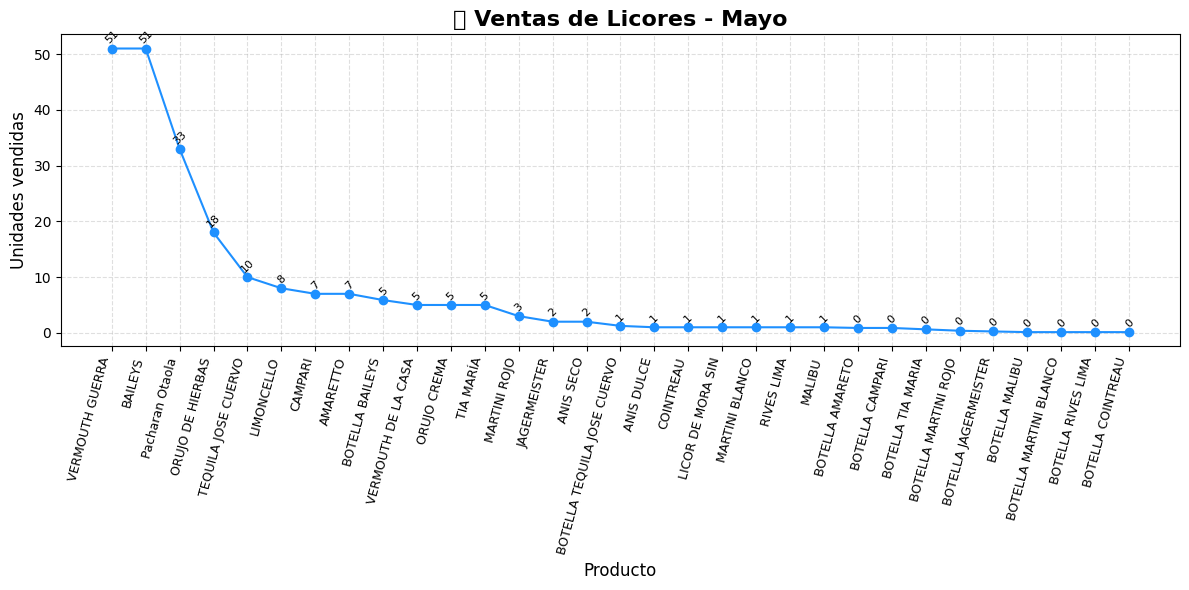

In [65]:
import matplotlib.pyplot as plt

# --- Filtrar la familia (usa tus variables inicio y fin del bloque anterior) ---
familia = df_preview[(df_preview['Índice'] >= inicio) & (df_preview['Índice'] <= fin)].copy()

# --- Ordenar de mayor a menor ---
familia_sorted = familia.sort_values(by='Unidades', ascending=False)

# --- Crear gráfico de puntos ---
plt.figure(figsize=(12, 6))
plt.plot(familia_sorted['Descripción'], familia_sorted['Unidades'], 'o-', color='dodgerblue')

# --- Etiquetas encima de cada punto ---
for x, y in zip(familia_sorted['Descripción'], familia_sorted['Unidades']):
    plt.text(x, y + max(familia_sorted['Unidades']) * 0.01,
             f"{int(y)}", ha='center', va='bottom', fontsize=8, rotation=45)

# --- Títulos y estilo ---
plt.title(f"📊 Ventas de {familia_seleccionada.capitalize()} - Mayo", fontsize=16, fontweight='bold')
plt.xlabel("Producto", fontsize=12)
plt.ylabel("Unidades vendidas", fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=9)
plt.grid(True, linestyle='--', alpha=0.4)
plt.subplots_adjust(bottom=0.3)
plt.tight_layout()

# --- Mostrar ---
plt.show()


In [33]:
# --- Limpiar la columna de beneficio ---
familia['Beneficio B.I.'] = (
    familia['Beneficio B.I.']
    .astype(str)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

# --- Ordenar de mayor a menor beneficio ---
beneficios_sorted = familia.sort_values(by='Beneficio B.I.', ascending=False)

# --- Mostrar el top 10 ---
print("💰 Cervezas con mayor beneficio:")
print(beneficios_sorted[['Descripción', 'Beneficio B.I.']].head(10))


💰 Cervezas con mayor beneficio:
            Descripción  Beneficio B.I.
127  CAÑITA 5 ESTRELLAS         3133.86
121          MAHOU 33CL         2402.68
128   JARRA 5 ESTRELLAS         2242.73
141       ALHAMBRA 1925         1878.55
147   MAHOU 0,0 TOSTADA          642.64
122           CORONITAS          511.64
133        CAÑA MAESTRA          265.27
138      San Miguel 0.0          246.09
125       PACK ALHAMBRA          150.00
129         CLARA LIMON          135.29


C:\Users\sgcov\AppData\Local\Temp\ipykernel_21952\3383087633.py:9: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sgcov\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


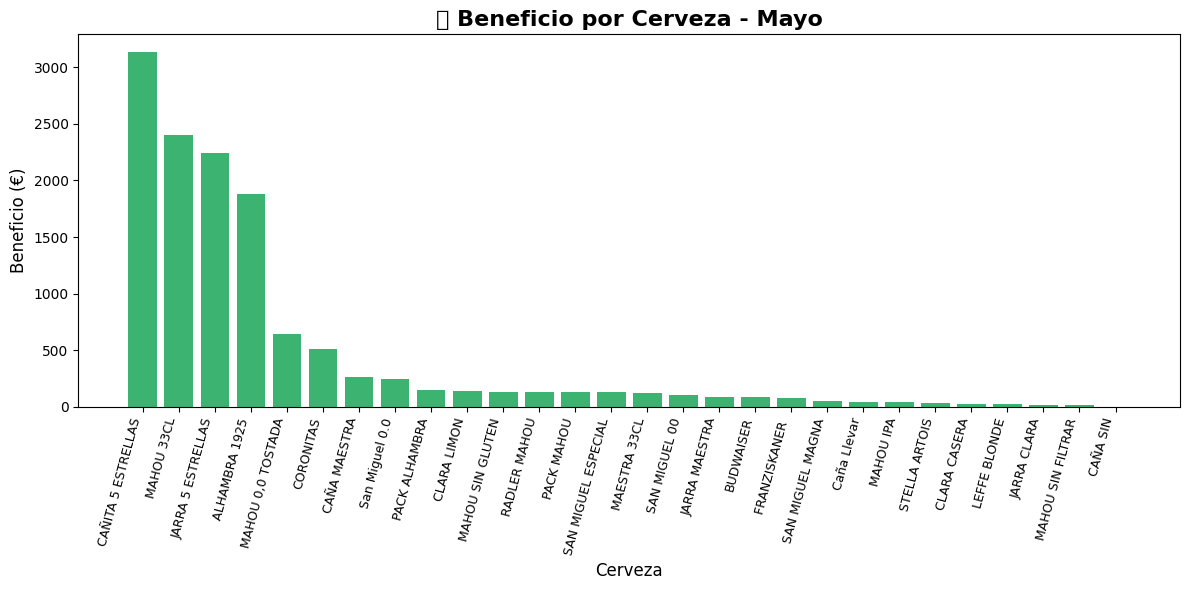

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(beneficios_sorted['Descripción'], beneficios_sorted['Beneficio B.I.'], color='mediumseagreen')
plt.title("💰 Beneficio por Cerveza - Mayo", fontsize=16, fontweight='bold')
plt.xlabel("Cerveza", fontsize=12)
plt.ylabel("Beneficio (€)", fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=9)
plt.tight_layout()
plt.show()
